# Titanic Survival Prediction Task

In [123]:
# Import libraries
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import warnings 
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [124]:
# Read dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')

In [125]:
# Check dataset head, statistical measures and important information 
def glimpse(df):
    print(f'Observations: {df.shape[0]} rows \nAttributes: {df.shape[1]} columns')
    print(f'Missing Values: {df.isnull().sum().sum()} values')
    print("-" * 100)
    display(df.head())
    print("-" * 100)
    display(df.describe())
    print("-" * 100)
    display(df.info())
    
df = titanic_df
glimpse(titanic_df)

Observations: 891 rows 
Attributes: 12 columns
Missing Values: 866 values
----------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


----------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [126]:
# Check variance for columns Ticket
titanic_df.Ticket.nunique()

681

**Columns Not Selected**
* Age and Cabin will be descarted due to the high number of missing values
* PassengerId, Name, and Ticket do not add variance to the analysis


In [127]:
# Select only important columns (8)
titanic_df = titanic_df[['Survived','Pclass','Sex','SibSp', 'Parch','Fare','Embarked']]

## Data Visualization

In [128]:
titanic_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [129]:
# Distribution of survival Bar plot 
fig = go.Figure()

fig.add_trace(go.Bar(
    x=titanic_df['Survived'].value_counts().index,
    y=titanic_df['Survived'].value_counts(),
    marker_color=['Blue','Orange'],
    text=titanic_df['Survived'].value_counts(),
    textfont=dict(size=14),
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['Not Survived', 'Survived'])

fig.update_layout(
    title='Distribution of Survival',
    xaxis=dict(title='Survival',title_font=dict(size=18)),
    yaxis=dict(title='Count',title_font=dict(size=18)),
    title_font=dict(size=20),
    title_x=0.5,
)

fig.show() 

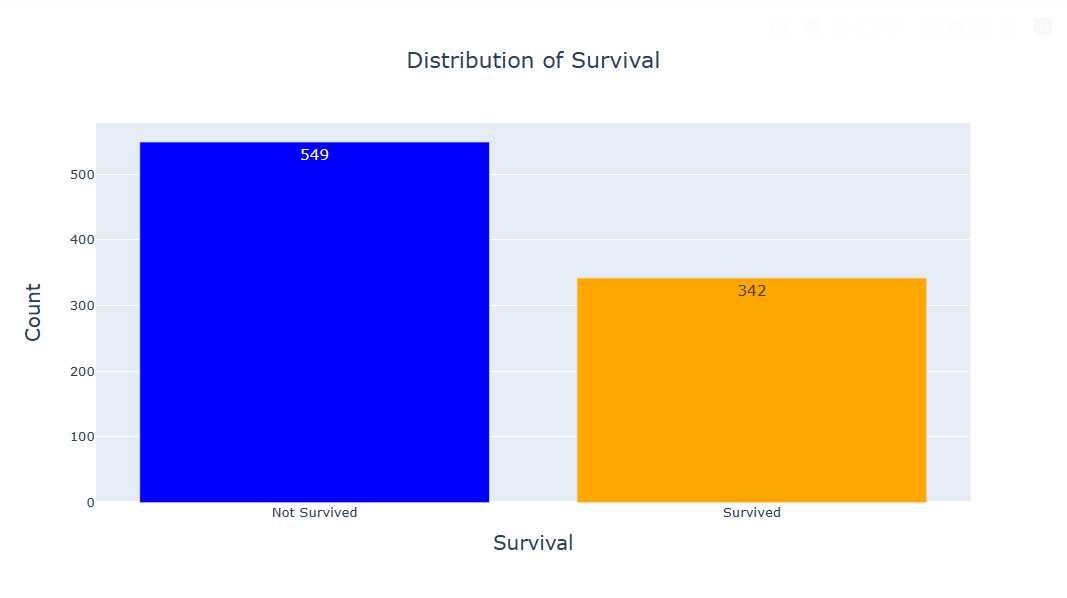

In [130]:
# Distribution for survival distribution by Sex
fig = go.Figure()

fig.add_trace(go.Bar(
    x=titanic_df.groupby(['Sex', 'Survived']).size().unstack().index,
    y=titanic_df.groupby(['Sex', 'Survived']).size().unstack()[1],  
    text=titanic_df.groupby(['Sex', 'Survived']).size().unstack()[1],
    textposition='inside',
    textfont=dict(size=14),
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Survived',
    name='Survived',
    marker_color='orange',
))

fig.add_trace(go.Bar(
    x=titanic_df.groupby(['Sex', 'Survived']).size().unstack().index,
    y=titanic_df.groupby(['Sex', 'Survived']).size().unstack()[0],  
    text=titanic_df.groupby(['Sex', 'Survived']).size().unstack()[0],
    textposition='inside',
    textfont=dict(size=14),
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Not Survived',
    name='Not Survived',
    marker_color='blue',
))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['Female', 'Male'])

fig.update_layout(
    title='Distribution of Survival by Sex',
    xaxis=dict(title='Survival', title_font=dict(size=18)),
    yaxis=dict(title='Count', title_font=dict(size=18)),
    title_font=dict(size=20),
    title_x=0.5,
    barmode='group',  
    legend=dict(title='Category'),
)

fig.show()

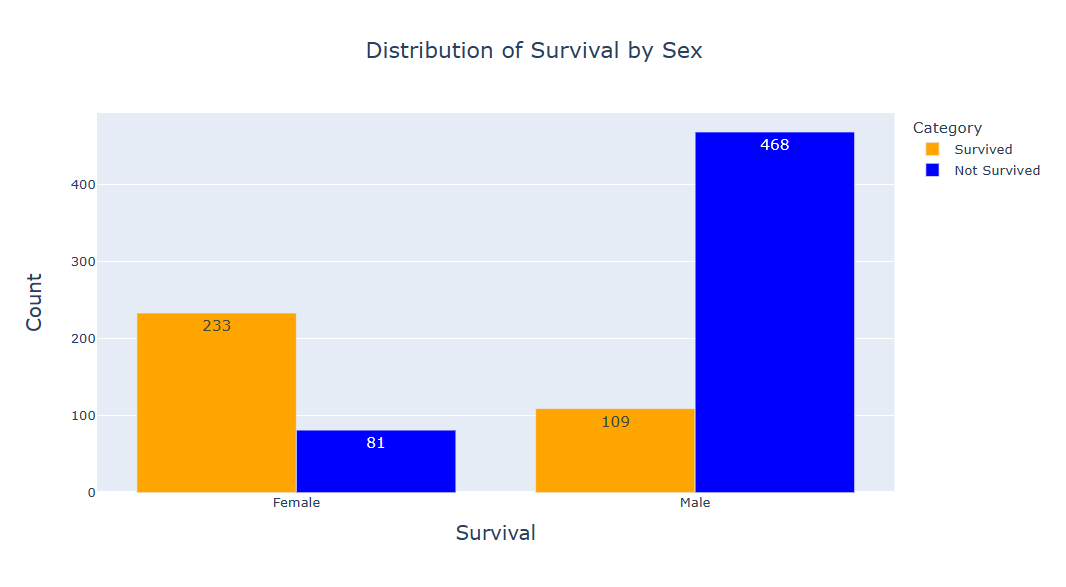

In [131]:
# Distribution for Survival by Passenger Class
fig = go.Figure()

class_colors = {1: '#ADD8E6', 2: '#008080', 3: '#006666'}

for pclass in [1, 2, 3]:
    filtered_df = titanic_df[titanic_df['Pclass'] == pclass]
    
    fig.add_trace(go.Bar(
        x=filtered_df['Survived'].value_counts().index.map({0: 'Not Survived', 1: 'Survived'}),
        y=filtered_df['Survived'].value_counts(),
        text=filtered_df['Survived'].value_counts(),
        textposition='inside',
        textfont=dict(size=14),
        hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
        marker_color=class_colors[pclass],
        name=f'Class {pclass}'
    ))

fig.update_xaxes(type='category')
fig.update_layout(
    title='Distribution for Survival by Passenger Class',
    xaxis=dict(title='Survival', title_font=dict(size=18)),
    yaxis=dict(title='Count', title_font=dict(size=18)),
    title_font=dict(size=20),
    title_x=0.5,
    barmode='group',
    legend=dict(title='Passenger Class'),
)

fig.show()

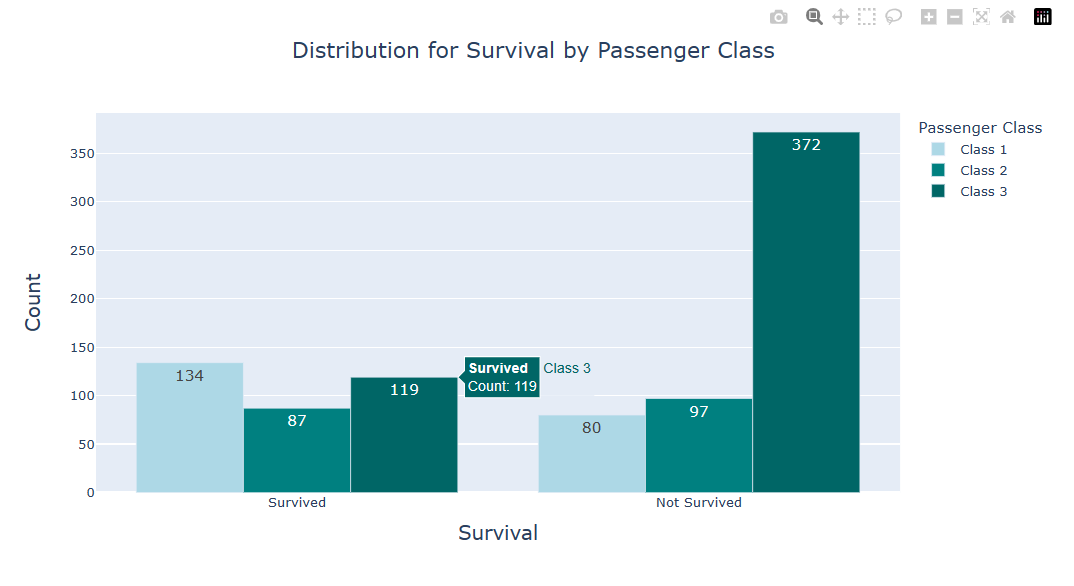

In [132]:
# Distribution for Survival by Embarked
fig = go.Figure()

embarked_colors = {'S': '#253494', 'C': '#1A9850', 'Q': '#756BB1'}
embarked_labels = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

for embarked in ['S', 'C', 'Q']:
    filtered_df = titanic_df[titanic_df['Embarked'] == embarked]
    
    fig.add_trace(go.Bar(
        x=filtered_df['Survived'].value_counts().index.map({0: 'Not Survived', 1: 'Survived'}),
        y=filtered_df['Survived'].value_counts(),
        text=filtered_df['Survived'].value_counts(),
        textposition='inside',
        textfont=dict(size=14),
        hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
        marker_color=embarked_colors[embarked],
        name=f'{embarked_labels[embarked]}'
    ))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['Not Survived', 'Survived'])
fig.update_layout(
    title='Distribution for Survival by Port of Embarkation',
    xaxis=dict(title='Survival', title_font=dict(size=18)),
    yaxis=dict(title='Count', title_font=dict(size=18)),
    title_font=dict(size=20),
    title_x=0.5,
    barmode='group',
    legend=dict(title='Port of Embarkation'),
)

fig.show()


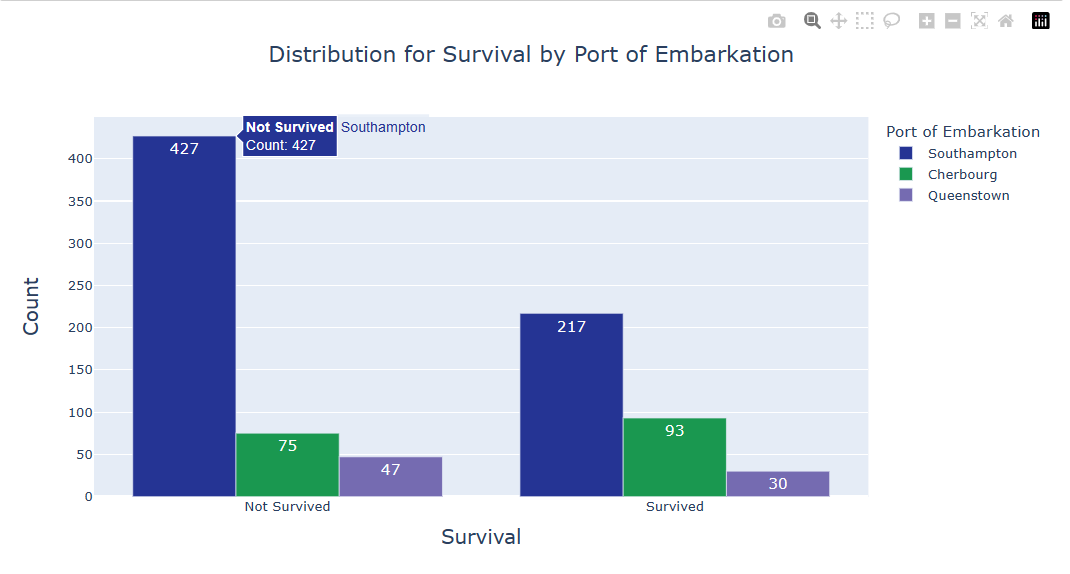

## Preprocessing

### Preprocessing: Handling Missing Data

In [133]:
# Check  missing data
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [134]:
# Drop all missing values
titanic_df.dropna(inplace=True)

### Preprocessing: Categorical Variable Handling

# Gradient Boosting Model XGBoost

# Naibe Bayes